In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Activation, Dropout
from sklearn.metrics import classification_report
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

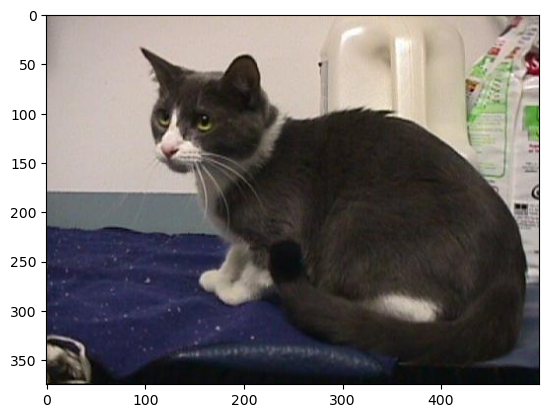

In [8]:
cat4=cv2.imread('CATS_DOGS/CATS_DOGS/train/CAT/4.jpg')
cat4=cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [9]:
cat4.shape

(375, 500, 3)

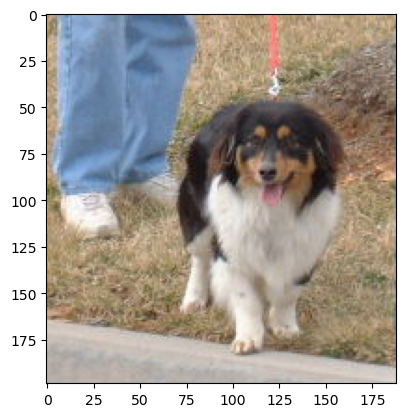

In [11]:
dog2=cv2.imread('CATS_DOGS/CATS_DOGS/train/DOG/2.jpg')
dog2=cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)
plt.imshow(dog2)

In [12]:
dog2.shape

(199, 188, 3)

In [6]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True, #ayna döndürme
                              fill_mode='nearest') #görüntüleri kaydırdığında oluşan boşlukları en yakın değer ile doldurma


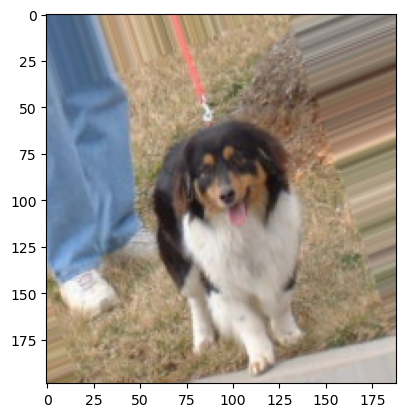

In [13]:
plt.imshow(image_gen.random_transform(dog2))

In [14]:
image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,183,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,221,857 (4.66 MB)

 Trainable params: 1,221,857 (4.66 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train',
                                               target_size=(150,150),
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [27]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/test',
                                               target_size=(150,150),
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [28]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [29]:
results = model.fit(train_image_gen, epochs=100, steps_per_epoch=150,
                             validation_data=train_image_gen, validation_steps=12)

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 67s 411ms/step - accuracy: 0.5228 - loss: 0.7024 - val_accuracy: 0.5885 - val_loss: 0.6866
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 56s 373ms/step - accuracy: 0.5484 - loss: 0.6904 - val_accuracy: 0.5677 - val_loss: 0.6881
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 52s 350ms/step - accuracy: 0.5661 - loss: 0.6834 - val_accuracy: 0.5677 - val_loss: 0.6790
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 47s 312ms/step - accuracy: 0.5618 - loss: 0.6845 - val_accuracy: 0.5885 - val_loss: 0.6758
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 45s 304ms/step - accuracy: 0.5570 - loss: 0.6826 - val_accuracy: 0.5885 - val_loss: 0.6715
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 45s 301ms/step - accuracy: 0.6027 - loss: 0.6680 - val_accuracy: 0.6250 - val_loss: 0.6760
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 43s 291ms/step - accuracy: 0.6186 - loss: 0.6581 - val_accuracy: 0.6198 - val_loss: 0.6287
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 222ms/step - accuracy: 0.6129 -

In [30]:
results.history

{'accuracy': [0.53125,
  0.5604166388511658,
  0.5687500238418579,
  0.5691666603088379,
  0.57791668176651,
  0.6018402576446533,
  0.6166666746139526,
  0.6162909865379333,
  0.6191666722297668,
  0.6187499761581421,
  0.6336261034011841,
  0.6383333206176758,
  0.6412500143051147,
  0.6479166746139526,
  0.6654166579246521,
  0.6644467115402222,
  0.6766666769981384,
  0.6708333492279053,
  0.6884148716926575,
  0.6854166388511658,
  0.6816666722297668,
  0.6949999928474426,
  0.6954166889190674,
  0.7038934230804443,
  0.7087500095367432,
  0.6992890238761902,
  0.71875,
  0.7079166769981384,
  0.7233333587646484,
  0.7191666960716248,
  0.7304166555404663,
  0.7110655903816223,
  0.730656623840332,
  0.7183333039283752,
  0.7283333539962769,
  0.7395833134651184,
  0.731249988079071,
  0.7391666769981384,
  0.7400000095367432,
  0.7479507923126221,
  0.7487499713897705,
  0.737500011920929,
  0.7479166388511658,
  0.7462499737739563,
  0.746666669845581,
  0.7545833587646484,
  0.

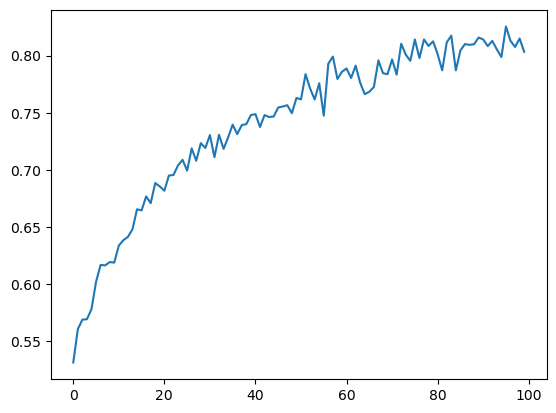

In [31]:
plt.plot(results.history['accuracy'])

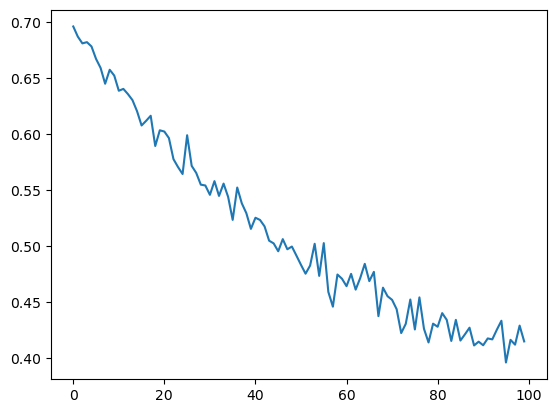

In [32]:
plt.plot(results.history['loss'])

In [33]:
model.save('mysupermodeldogcat.h5')

In [60]:
dog_file = 'CATS_DOGS/CATS_DOGS/test/DOG/10005.jpg'
dog_img = image.load_img(dog_file, target_size=(150,150))
dog_img = image.img_to_array(dog_img)

In [61]:
dog_img.shape

(150, 150, 3)

In [62]:
dog_img = np.expand_dims(dog_img, axis=0)

In [63]:
dog_img.shape

(1, 150, 150, 3)

In [64]:
dog_img = dog_img / 255

In [68]:
predictions=model.predict(dog_img)
class_labels = (predictions > 0.5).astype("int32")
class_labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[1]])